# EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw=pd.read_csv('../data/anonymus_data.csv')
df_raw.describe(include='all')

,Unnamed: 0,date_tech,boeking_eur,is_blacklist,is_redlist,is_whitelist,a_key,b_key
count,2.198265e+06,2198265,2.198265e+06,2198265,2198265,2198265,2198265,2198265
unique,NaN,794,NaN,2,2,2,49838,418236
top,NaN,2019-10-28 00:00:00.000,NaN,False,False,False,A40734,B401552
freq,NaN,88343,NaN,2180140,2197961,2198255,32539,81923
mean,1.099132e+06,NaN,6.018905e+01,NaN,NaN,NaN,NaN,NaN
std,6.345846e+05,NaN,1.707733e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,-4.566600e+07,NaN,NaN,NaN,NaN,NaN
25%,5.495660e+05,NaN,-2.102400e+02,NaN,NaN,NaN,NaN,NaN
50%,1.099132e+06,NaN,-2.409000e+01,NaN,NaN,NaN,NaN,NaN
75%,1.648698e+06,NaN,7.929000e+01,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df_raw.drop(columns='Unnamed: 0')
df

,date_tech,boeking_eur,is_blacklist,is_redlist,is_whitelist,a_key,b_key
0,2019-09-02 00:00:00.000,-8225.21,False,False,False,A11526,B15942
1,2019-09-02 00:00:00.000,-4.95,False,False,False,A43154,B26295
2,2019-09-02 00:00:00.000,-110.00,False,False,False,A20807,B400347
3,2019-09-02 00:00:00.000,10100.00,False,False,False,A41952,B96395
4,2019-09-02 00:00:00.000,-3255.97,False,False,False,A34940,B11390
...,...,...,...,...,...,...,...
2198260,2019-11-22 00:00:00.000,-3006.85,False,False,False,A28017,B33145
2198261,2019-11-25 00:00:00.000,118.00,False,False,False,A40734,B60395
2198262,2019-11-25 00:00:00.000,24.80,False,False,False,A49318,B275357
2198263,2019-11-27 00:00:00.000,-21.30,False,False,False,A40734,B374463


## Questions about blacklist,redlist,whitelist meaning

### Assumptions about whitelist meaning:
1. if blacklist is True, whitelist refers to B account
2. if redlist is True, whitelist refers to A account
3. if both are False, whitelist refers to both accounts

In [4]:
df_white=df[df.is_whitelist]
df_white.describe(include=[np.object,np.bool])

,date_tech,is_blacklist,is_redlist,is_whitelist,a_key,b_key
count,10,10,10,10,10,10
unique,8,1,1,1,7,5
top,2019-11-29 17:05:12.000,False,False,True,A14028,B350370
freq,2,10,10,10,3,5


only 7 accounts are whitelisted (10 transactions)

Assumptiom assessment:
1. does not matter. no such example in our data
2. does not matter. no such example in our data
3. confirmed (black and red in the above dataframe have False as unique value)

idea: ignore is_whitelist column

## Blacklist exploration

In [5]:
df_black=df[df.is_blacklist]
df_black.describe(include=[np.object,np.bool])

,date_tech,is_blacklist,is_redlist,is_whitelist,a_key,b_key
count,18125,18125,18125,18125,18125,18125
unique,67,1,2,1,91,9192
top,2019-10-15 00:00:00.000,True,False,False,A27913,B401552
freq,2157,18125,18120,18125,10954,167


## Redlist exploration

91 unique blacklisted A accounts (18125 transactions)

In [6]:
df_red=df[df.is_redlist]
df_red.describe(include=[np.object,np.bool])

,date_tech,is_blacklist,is_redlist,is_whitelist,a_key,b_key
count,304,304,304,304,304,304
unique,61,2,1,1,139,12
top,2019-10-30 00:00:00.000,False,True,False,A40734,B112486
freq,12,299,304,304,64,68


12 unique redlisted accounts (only 304 transactions)

## Black <-> Red combination

In [7]:
df_black_red=df[df.is_blacklist & df.is_redlist]
df_black_red.describe(include=[np.object,np.bool])

,date_tech,is_blacklist,is_redlist,is_whitelist,a_key,b_key
count,5,5,5,5,5,5
unique,5,1,1,1,2,2
top,2019-10-17 00:00:00.000,True,True,False,A30983,B123084
freq,1,5,5,5,4,4


2 unique accounts involved in direct suspicious transactions (black<->red)

### Overview of above results

In [8]:
size_df=df.groupby(['is_blacklist','is_redlist']).size().to_frame('size')
nuniqueA_df=df.groupby(['is_blacklist','is_redlist']).a_key.nunique().to_frame('nunique A')
nuniquaB_df=df.groupby(['is_blacklist','is_redlist']).b_key.nunique().to_frame('nunique B')

In [9]:
pd.concat([size_df,nuniqueA_df,nuniquaB_df], axis=1, sort=False)

size  nunique A  nunique B
is_blacklist is_redlist                               
False        False       2179841      49747     410372
             True            299        137         12
True         False         18120         91       9190
             True              5          2          2

## Explore transactions of blacklisted accounts that have direct link with redlisted accounts

In [10]:
# find transactions for badguy1
badguy1=df_black_red.a_key.unique()[0]
badguy1_transactions=df[df.a_key==badguy1]
badguy1_transactions_dateindexed=badguy1_transactions[['date_tech','boeking_eur']].set_index('date_tech')
# find transactions for badguy2
badguy2=df_black_red.a_key.unique()[1]
badguy2_transactions=df[df.a_key==badguy2]
badguy2_transactions_dateindexed=badguy2_transactions[['date_tech','boeking_eur']].set_index('date_tech')

In [23]:
%matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot transactions
fig,ax=plt.subplots(nrows=2,sharex=True)
markerline, stemline, baseline = ax[0].stem('date_tech', 'boeking_eur',data=badguy1_transactions,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)


markerline, stemline, baseline = ax[1].stem('date_tech', 'boeking_eur',data=badguy2_transactions,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
ax[0].format_xdata = mdates.DateFormatter('%d-%m-%Y')
fig.autofmt_xdate()


Using matplotlib backend: Qt5Agg


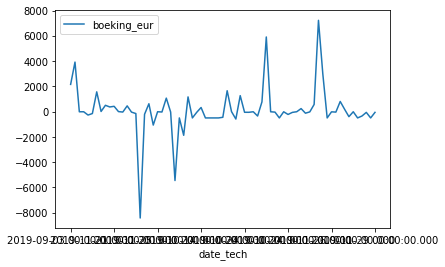

In [12]:
ax=badguy1_transactions_dateindexed.plot()

## Questions about A,B accounts

How can we see if a b_key refers to an internal account?

If a b_key refers to an internal account, can that account be also refered to by an a_key in the dataset?

## Explore the most suspicious A account

In [13]:
blacklist=df_black.a_key.unique()
blacklist

array(['A44266', 'A33488', 'A27913', 'A5443', 'A39805', 'A34184',
       'A12194', 'A16905', 'A4938', 'A45254', 'A7819', 'A19081', 'A3158',
       'A18614', 'A8667', 'A7133', 'A17981', 'A11558', 'A7728', 'A36531',
       'A43027', 'A22195', 'A17601', 'A40134', 'A3027', 'A19088',
       'A22656', 'A11868', 'A30983', 'A29283', 'A34665', 'A9580',
       'A32700', 'A21758', 'A20708', 'A594', 'A32160', 'A15517', 'A2994',
       'A34437', 'A7450', 'A45176', 'A25525', 'A16250', 'A27493', 'A7950',
       'A41470', 'A2970', 'A13587', 'A34396', 'A30147', 'A20231', 'A8243',
       'A10591', 'A34789', 'A23320', 'A1254', 'A14689', 'A25072', 'A8030',
       'A98', 'A13779', 'A10055', 'A1654', 'A4102', 'A31335', 'A38379',
       'A11825', 'A303', 'A497', 'A36927', 'A20247', 'A46865', 'A26873',
       'A16741', 'A6046', 'A19602', 'A23462', 'A48017', 'A12052',
       'A30607', 'A44366', 'A46589', 'A6182', 'A6786', 'A26350', 'A18618',
       'A8650', 'A48026', 'A4568', 'A42506'], dtype=object)